In [ ]:
# notwendige Bibliotheken importieren und erste Verbesserungen der Einstellungen
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # alle Ausgaben einer Zelle in iPython anzeigen
import pandas as pd
_ = pd.option_context('display.max_columns', None) # damit mehr als 20 Spalten angezeigt werden.
#                                                    _ =  damit Objektausgabe unterdrückt wird.


In [78]:
# Daten einLesen und erste Datensicht


path = 'c:/myBox/Projekte/FHDW/Kurs DAML/python/dmc2010_train.txt' # für lokale Dateien
#path = 'https://raw.githubusercontent.com/FHDW-DAML/22Q4/main/dmc2010_train.txt'  # für Colab

date_cols = ['date', 'datecreated', 'deliverydatepromised', 'deliverydatereal']

df = pd.read_csv(path, sep=';', index_col='customernumber', parse_dates=date_cols)



In [83]:
print ("Ausgabe des python/pandas Befehls df.info()")
df.info()
print ("\nAusgabe des python/pandas Befehls df.head().T Mit .T für Transpose, also werden Spalten")
print ("     und Zeilen vertauscht, damit die Darstellung einfacher lesbar wird.")
f.head().T 
print ("\nAusgabe des python/pandas Befehls df.describe()")
df.describe()

Ausgabe des python/pandas Befehls df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32428 entries, 41191 to 58849
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  32428 non-null  datetime64[ns]
 1   salutation            32428 non-null  int64         
 2   title                 32428 non-null  int64         
 3   domain                32428 non-null  int64         
 4   datecreated           32428 non-null  datetime64[ns]
 5   newsletter            32428 non-null  int64         
 6   model                 32428 non-null  int64         
 7   paymenttype           32428 non-null  int64         
 8   deliverytype          32428 non-null  int64         
 9   invoicepostcode       32428 non-null  int64         
 10  delivpostcode         1392 non-null   object        
 11  voucher               32428 non-null  int64         
 12  advertisingdatacode   6523

In [57]:
print ("Welche Spalten enthalten NaN (not a number)?")
print(df.isna().sum())


Welche Spalten enthalten NaN (not a number)?
date                        0
salutation                  0
title                       0
domain                      0
datecreated                 0
newsletter                  0
model                       0
paymenttype                 0
deliverytype                0
invoicepostcode             0
delivpostcode           31036
voucher                     0
advertisingdatacode     25905
case                        0
numberitems                 0
gift                        0
entry                       0
points                      0
shippingcosts               0
deliverydatepromised        0
deliverydatereal            0
weight                      0
remi                        0
cancel                      0
used                        0
w0                          0
w1                          0
w2                          0
w3                          0
w4                          0
w5                          0
w6                       

In [86]:
print ("Alle Spalten mit NaN Werte im data frame löschen wir, damit das k-nächste Nachbarn Verfahren arbeiten kann.")
df.drop(columns=['advertisingdatacode', 'delivpostcode'], inplace=True, axis=1)
print ("Alle Datumsfelder im data frame löschen wir, damit das k-nächste Nachbarn Verfahren arbeiten kann.")
df.drop(columns=date_cols, inplace=True, axis=1)


Alle Spalten mit NaN Werte im data frame löschen wir, damit das k-nächste Nachbarn Verfahren arbeiten kann.


KeyError: "['advertisingdatacode', 'delivpostcode'] not found in axis"

In [59]:
y = df['target90']
x = df.drop(['target90'], axis = 1)

x.head().T
y.head().T


customernumber,41191,38860,61917,40647,1347
salutation,0,1,0,1,0
title,0,0,0,0,0
domain,9,4,12,8,1
newsletter,0,0,0,0,0
model,2,1,1,1,1
paymenttype,2,1,0,0,1
deliverytype,0,1,0,0,1
invoicepostcode,58,34,51,25,41
voucher,1,0,0,0,0
case,2,2,1,3,4


customernumber
41191    0
38860    0
61917    0
40647    0
1347     0
Name: target90, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)
x_train.shape
y_train.shape
x_test.shape
y_test.shape
#x_test.info()
x_train.head().T
y_train.head().T

(24321, 30)

(24321,)

(8107, 30)

(8107,)

customernumber,34539,51967,32184,24599,58004
salutation,1,1,0,1,1
title,0,0,0,0,0
domain,2,4,1,4,12
newsletter,0,0,0,0,1
model,1,3,1,3,1
paymenttype,2,2,0,2,0
deliverytype,0,0,0,0,0
invoicepostcode,40,71,44,45,42
voucher,0,0,0,0,0
case,1,3,1,3,4


customernumber
34539    0
51967    1
32184    1
24599    0
58004    0
Name: target90, dtype: int64

In [95]:
## Erstes Modell berechnen
from sklearn.neighbors import KNeighborsClassifier
k_param = 12

knn = KNeighborsClassifier(n_neighbors=k_param)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)



KNeighborsClassifier(n_neighbors=12)

In [96]:
# Test für eine Vorhersage

data = dict         \
(salutation=2, title=0, domain=12, newsletter=0, model=3, paymenttype=3, deliverytype=0, invoicepostcode=47,\
voucher=0, case=3, numberitems=1, gift=0, entry=1, points=0, shippingcosts=0, weight=0, remi=0, cancel=0,\
used=0, w0=0, w1=0, w2=0, w3=0, w4=0, w5=0, w6=0, w7=0, w8=0, w9=0, w10=0)
df_test1 = pd.DataFrame(data, index=[0])
test1 = knn.predict(df_test1)
print (test1)


[0]


<AxesSubplot:>

Text(0.5, 1.0, 'Wahrheitsmatrix 12-NN')

Text(113.9222222222222, 0.5, 'Wahre Testdaten')

Text(0.5, 23.52222222222222, 'Vorhersagen')


TN=6583 FN=1493 TP=6 FP=25
Optimierungsfunktion der Umsatzsteigerung = 1,5 * TN - 5 * FN
Die TN würden ohne Gutschein nicht erneut bestellen.
Die FN würden auch mit Gutschein erneut bestellen.
Umsatzsteigerung für das aktuelle Modell = 2409.50€
Umsatzsteigerung, wenn alle Kunden einen Gutschein bekommen (Baseline) = 9310.50€

Hyperparameter k = 12 für das k-Nearest Neighbor Verfahren
Genauigkeit = 0.81
Recall = 0.00
Präzision = 0.19
F1 Wert = 0.01


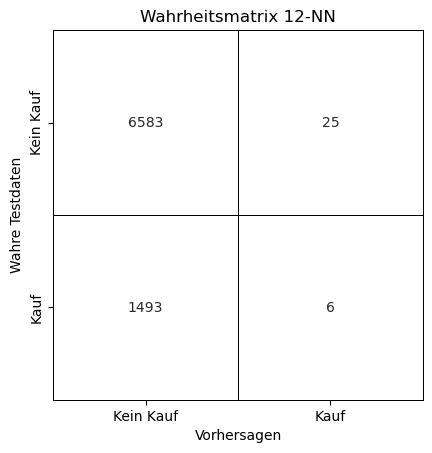

In [97]:
# Wahrheitsmatrix und Maßzahlen der Vorhersage untersuchen

from sklearn import metrics as met 
import seaborn as sns #importing Seaborn's to use the heatmap 
import matplotlib.pyplot as plt 


# Adding classes names for better interpretation
classes_names = ['Kein Kauf','Kauf']
cm = met.confusion_matrix(y_test, y_pred);
cmdf = pd.DataFrame(cm, columns=classes_names, index = classes_names);
                  
# Seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cmdf, annot=True, fmt='d', square=True,
            cmap='gray_r', vmin=0, vmax=0,  # set all cells to white
            linewidths=0.5, linecolor='k',  # draw black grid lines
            clip_on=False,                  # inhibits clipping of right and lower square lines
            cbar=False);                     # disable colorbar

plt.title("Wahrheitsmatrix "+str(k_param)+"-NN");
plt.ylabel('Wahre Testdaten');
plt.xlabel('Vorhersagen');

tn, fp, fn, tp = cm.ravel();
print ("\nTN="+str(tn) + " FN="+str(fn) + " TP="+str(tp) + " FP="+str(fp))
print ("Optimierungsfunktion der Umsatzsteigerung = 1,5 * TN - 5 * FN")
print ("Die TN würden ohne Gutschein nicht erneut bestellen.")
print ("Die FN würden auch mit Gutschein erneut bestellen.")
print ("Umsatzsteigerung für das aktuelle Modell = {:.2f}".format(1.5*tn - 5*fn)+"€")
print ("Umsatzsteigerung, wenn alle Kunden einen Gutschein bekommen (Baseline) = {:.2f}".format(1.5*26377  - 5*6051 )+"€")
print("\nHyperparameter k = "+str(k_param)+" für das k-Nearest Neighbor Verfahren")
print ("Genauigkeit = {:.2f}".format(met.accuracy_score(y_test, y_pred)))
print ("Recall = {:.2f}".format(met.recall_score(y_test, y_pred, average='binary')))
print ("Präzision = {:.2f}".format(met.precision_score(y_test, y_pred, average='binary')))
print ("F1 Wert = {:.2f}".format(met.f1_score(y_test, y_pred, average='binary')))


In [ ]:
# Optimalen Hyperparameter k für k-Nearest Neighbors bestimmen

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as met 
import matplotlib.pyplot as plt 

acc = []
f1s = []
rec = []
pre = []
tp = []
tn = []
fp = []
fn = []
# Berechne Maßzahlen der Vorhersagequalität für K Werte zwischen 1 and 20
maxrange=30
for i in range(1, maxrange):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = met.confusion_matrix(y_test, y_pred)
    tni, fpi, fni, tpi = cm.ravel()
    tn.append(tni)
    tp.append(tpi)
    fn.append(fni)
    fp.append(fpi)
    acc.append(met.accuracy_score(y_test, y_pred))
    rec.append(met.recall_score(y_test, y_pred, average='binary'))
    pre.append(met.precision_score(y_test, y_pred, average='binary'))
    f1s.append(met.f1_score(y_test, y_pred, average='binary'))

figsizex=12
figsizey=4
plt.figure(figsize=(figsizex, figsizey))
plt.plot(range(1, maxrange), tp, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1, maxrange), tn, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.plot(range(1, maxrange), fp, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, maxrange), fn, color='black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('TP (rot), TN (grün), FP (blau), FN (schwarz) gegen K Wert')
plt.xlabel('K Wert')
plt.ylabel('TP (rot), TN (grün), FP (blau), FN (schwarz)')

plt.figure(figsize=(figsizex, figsizey))
plt.plot(range(1, maxrange), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score gegen K Wert')
plt.xlabel('K Wert')
plt.ylabel('F1 Score')

plt.figure(figsize=(figsizex, figsizey))
plt.plot(range(1, maxrange), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Genauigkeit gegen K Wert')
plt.xlabel('K Wert')
plt.ylabel('Genauigkeit')

plt.figure(figsize=(figsizex, figsizey))
plt.plot(range(1, maxrange), rec, color='black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.plot(range(1, maxrange), pre, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Recall (schwarz), Präzision (grün) gegen K Wert')
plt.xlabel('K Wert')
plt.ylabel('Recall (schwarz), Präzision (grün)')


